In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error


In [25]:
df = pd.read_excel(r'C:\Users\User\Desktop\oil\data.xlsx')

In [26]:
df.head(4)

,Heff,Perm,Sg,L_hor,GS,temp,C5,GRP,cond rate,gas rate,NPV,sum cond,sum gas,nGS
0,5,0.1,0.4,1200,S-TYPE,1.023962,300,12,7.008923,24.556392,-518.796275,12.55730,60.88822,1
1,5,0.1,0.4,1200,S-TYPE,1.023962,300,12,7.008923,24.556392,-518.796275,12.55730,60.88822,1
2,5,0.1,0.7,1200,S-TYPE,0.682594,400,12,12.817532,29.035123,-487.985227,30.53996,97.43588,1
3,5,1.0,0.7,1200,S-TYPE,2.874361,400,12,41.972438,122.265151,-378.712873,51.73634,188.76430,1


In [27]:
df.shape

(6804, 14)

In [28]:
df.describe()

,Heff,Perm,Sg,L_hor,temp,C5,GRP,cond rate,gas rate,NPV,sum cond,sum gas,nGS
count,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000,6804.000000
mean,16.666667,1.033333,0.550000,1298.412698,1.821029,350.000000,9.793651,56.520785,165.252545,-202.393870,119.109663,499.986437,0.984127
std,10.274778,0.776087,0.150011,488.795954,1.296676,50.003675,5.002458,51.484610,142.164983,309.876559,107.826121,429.570025,0.124993
min,5.000000,0.100000,0.400000,0.000000,0.073152,300.000000,1.000000,1.112635,3.159162,-786.548574,4.788555,17.534730,0.000000
25%,5.000000,0.100000,0.400000,1000.000000,0.682097,300.000000,6.000000,17.818899,48.055712,-398.805472,38.493395,171.355425,1.000000
50%,15.000000,1.000000,0.550000,1200.000000,1.835660,350.000000,10.000000,36.708753,114.693562,-304.936269,81.179420,311.453100,1.000000
75%,30.000000,2.000000,0.700000,1500.000000,2.386769,400.000000,12.000000,81.345911,251.276171,-23.133324,171.753700,719.788650,1.000000
max,30.000000,2.000000,0.700000,2000.000000,7.562910,400.000000,20.000000,310.075616,752.398082,876.687031,547.448400,1856.309000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804 entries, 0 to 6803
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Heff       6804 non-null   int64  
 1   Perm       6804 non-null   float64
 2   Sg         6804 non-null   float64
 3   L_hor      6804 non-null   int64  
 4   GS         6804 non-null   object 
 5   temp       6804 non-null   float64
 6   C5         6804 non-null   int64  
 7   GRP        6804 non-null   int64  
 8   cond rate  6804 non-null   float64
 9   gas rate   6804 non-null   float64
 10  NPV        6804 non-null   float64
 11  sum cond   6804 non-null   float64
 12  sum gas    6804 non-null   float64
 13  nGS        6804 non-null   int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 744.3+ KB


In [30]:
df.isnull().sum()

Heff         0
Perm         0
Sg           0
L_hor        0
GS           0
temp         0
C5           0
GRP          0
cond rate    0
gas rate     0
NPV          0
sum cond     0
sum gas      0
nGS          0
dtype: int64

In [31]:
print(df.columns)

Index(['Heff', 'Perm', 'Sg', 'L_hor', 'GS', 'temp', 'C5', 'GRP', 'cond rate',
       'gas rate', 'NPV', 'sum cond', 'sum gas', 'nGS'],
      dtype='object')


<Axes: xlabel='Heff', ylabel='Count'>

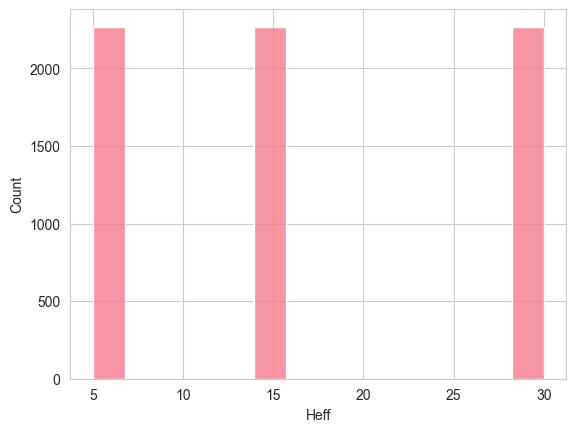

In [32]:
sns.histplot(df['Heff'])

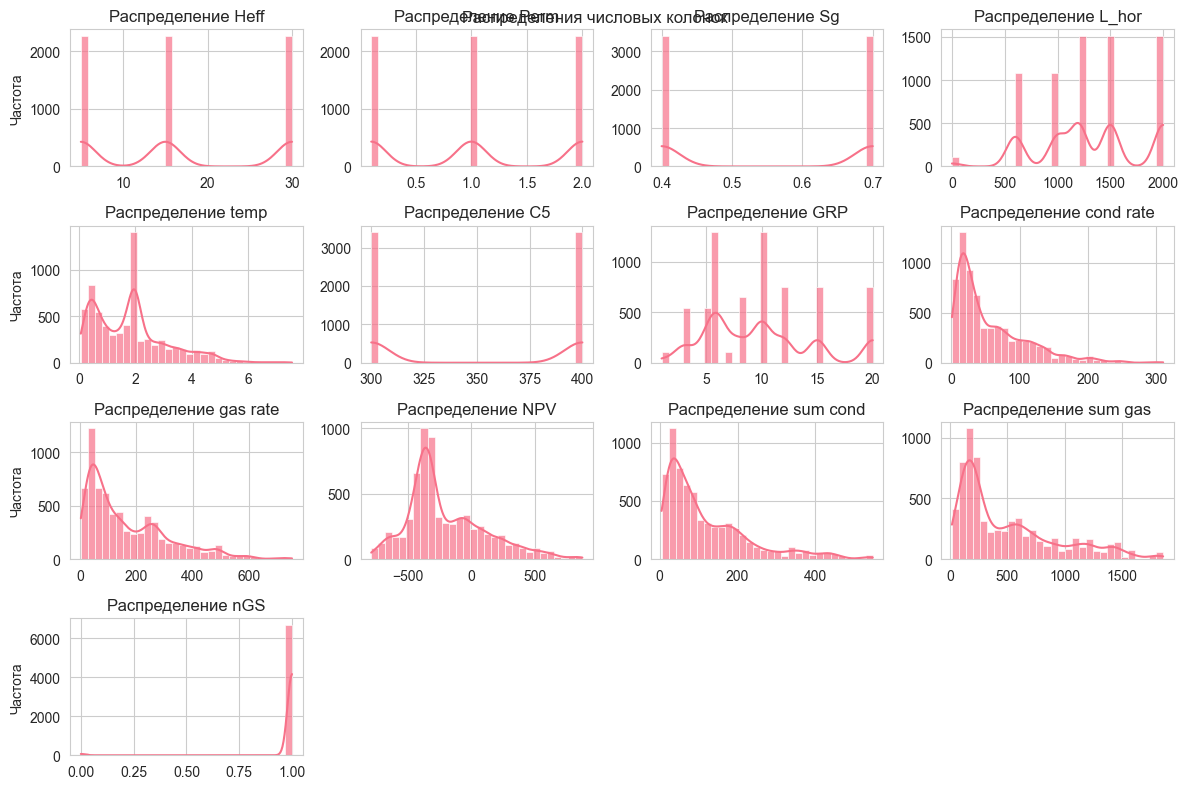

In [33]:
sns.set_style("whitegrid")
sns.set_palette("husl")  # Красивая палитра цветов

# Фильтруем только числовые колонки
numeric_cols = df.select_dtypes(include=[float, int]).columns

# Определяем размер сетки (например, ceil(sqrt(n)) для квадратной формы)
n_cols = len(numeric_cols)
n_rows = int(n_cols ** 0.5) + 1
n_cols_grid = int(n_cols / n_rows) + 1

fig, axes = plt.subplots(n_rows, n_cols_grid, figsize=(12, 8), sharex=False, sharey=False)
axes = axes.flatten()  # Превращаем в 1D-массив для простоты

# Строим графики
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], alpha=0.7)  # Гистограмма с KDE
    axes[i].set_title(f'Распределение {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Частота' if i % n_cols_grid == 0 else '')  # Подпись только слева

# Убираем пустые субплоты, если колонок меньше ячеек
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Автоматическая корректировка расстояний
plt.suptitle('Распределения числовых колонок', fontsize=12, y=0.98)  # Общий заголовок
plt.show()


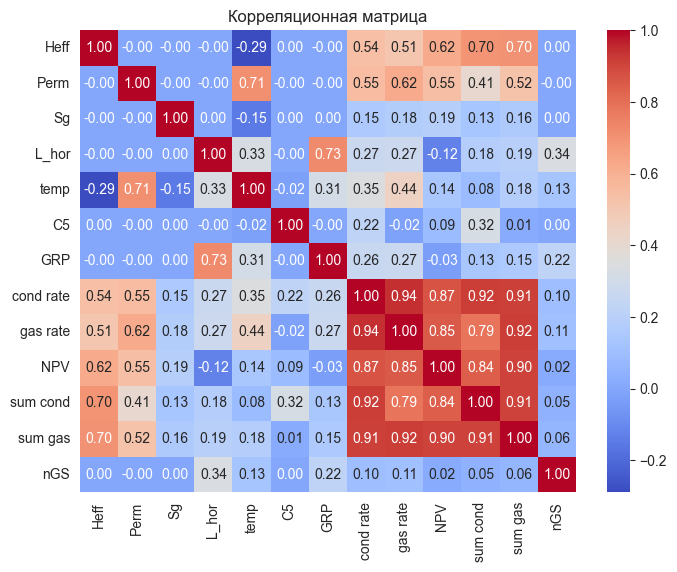

In [34]:
corr=df.select_dtypes(include=['float','int']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

In [35]:
df.select_dtypes(include=['object']).value_counts()

GS    
GS        3348
NGS       1080
VGS       1080
S-TYPE     648
U-TYPE     648
Name: count, dtype: int64

In [36]:
x=df.drop(['cond rate','gas rate','sum cond','sum gas','NPV'],axis=1)
y=df['NPV']

In [37]:
# One-Hot Encoding для GS
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' избегает мультиколлинеарности
encoded_cols = encoder.fit_transform(x[['GS']])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['GS']))
X = pd.concat([x.drop('GS', axis=1), encoded_df], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Определяем модель XGBoost
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Задаём сетку гиперпараметров для поиска
param_grid = {
    'n_estimators': [10,50, 100, 200,1000],
    'max_depth': [3, 5, 7,15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0]
}

# Создаём GridSearchCV с 5-fold кросс-валидацией и метрикой R2
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Запускаем подбор гиперпараметров на тренировочных данных
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print(f"Лучшее значение R2 на кросс-валидации: {grid_search.best_score_:.4f}")

# Используем лучшую модель для предсказаний на тесте
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Оцениваем модель на тестовой выборке
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Тестовые метрики для XGBoost:")
print(f"  MAE = {mae:.2f}")
print(f"  R2  = {r2:.2f}")
print(f"  MAPE= {mape:.2%}")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.7}
Лучшее значение R2 на кросс-валидации: 0.9998
Тестовые метрики для XGBoost:
  MAE = 2.39
  R2  = 1.00
  MAPE= 2.43%


Тестовые метрики для XGBoost:
  MAE = 2.39
  R2  = 1.00
  MAPE= 2.43%


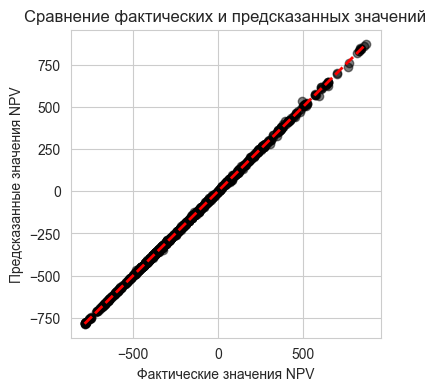

In [43]:
# Оцениваем модель на тестовой выборке
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Тестовые метрики для XGBoost:")
print(f"  MAE = {mae:.2f}")
print(f"  R2  = {r2:.2f}")
print(f"  MAPE= {mape:.2%}")

# Построение графиков для анализа модели

# 1. Scatter plot: Фактические vs. Предсказанные
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения NPV')
plt.ylabel('Предсказанные значения NPV')
plt.title('Сравнение фактических и предсказанных значений')
plt.grid(True)
plt.show()


Топ-10 важных признаков:
      Признак  Важность
1        Perm  0.531540
0        Heff  0.267745
2          Sg  0.091130
3       L_hor  0.063031
5          C5  0.016295
4        temp  0.015308
6         GRP  0.012939
11     GS_VGS  0.000686
8      GS_NGS  0.000684
10  GS_U-TYPE  0.000549


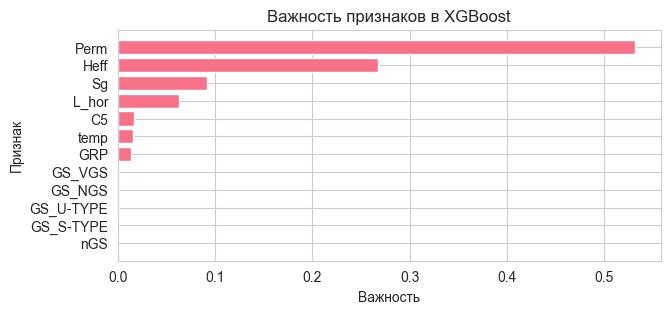

In [45]:
# Определение важности признаков
feature_importances = best_model.feature_importances_
feature_names = X_train.columns  # Названия признаков

# Создаем DataFrame для удобного отображения
importance_df = pd.DataFrame({
    'Признак': feature_names,
    'Важность': feature_importances
}).sort_values(by='Важность', ascending=False)

# Выводим топ-10 важных признаков в консоль
print("\nТоп-10 важных признаков:")
print(importance_df.head(10))

# Построение графика важности признаков
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))
plt.barh(importance_df['Признак'][:20], importance_df['Важность'][:20])  # Топ-20 для читаемости
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.title('Важность признаков в XGBoost')
plt.gca().invert_yaxis()  # Инвертируем ось Y для лучшего вида
plt.show()